In [1]:
from applied_planning.sim.adapters.mujoco_backend import MujocoLite6Adapter
import numpy as np

# Initialize simulator
path_to_xml = "/Users/braeden/Development/applied-planning/src/applied_planning/sim/assets/ufactory_lite6/lite6.xml"
sim = MujocoLite6Adapter(
    path_to_xml,
    viewer=False,
    render_mode="offscreen"
)
sim.reset()

# Define goal joint configuration
goal = np.array([0.5, -0.3, 0.8, 0.0, 1.0, 0.0])

# Plan and execute with RRT
path = sim.plan_and_execute_path(
    goal=goal,
    planner_type="rrt",  # or "linear" for faster straight-line planning
    joint_limits=sim.get_joint_limits(),
    collision_fn=sim.check_collision,
    execute=True
)

Offscreen renderer initialized (notebook-friendly mode)


In [ ]:

# The interactive MuJoCo viewer does NOT work in Jupyter notebooks on macOS.
# 
# To see the robot moving in real-time, run this in the terminal:
#
#   cd /Users/braeden/Development/applied-planning
#   python scripts/demo_path_planning.py
#
# Options:
#   --speed 0.5      # Slower motion (easier to watch)
#   --planner linear # Faster planning
#   --help           # See all options


In [5]:
# IMPORTANT: If you get "unexpected keyword argument 'render_mode'" error,
# you need to restart the Jupyter kernel: Kernel -> Restart Kernel
# This ensures the updated code is loaded

import sys
import importlib

# Force reload of the module to get latest changes
if 'applied_planning.sim.adapters.mujoco_backend' in sys.modules:
    importlib.reload(sys.modules['applied_planning.sim.adapters.mujoco_backend'])

from applied_planning.sim.adapters.mujoco_backend import MujocoLite6Adapter
import numpy as np

# Initialize simulator
path_to_xml = "/Users/braeden/Development/applied-planning/src/applied_planning/sim/assets/ufactory_lite6/lite6.xml"
sim = MujocoLite6Adapter(
    path_to_xml,
    viewer=False,
    render_mode="offscreen"
)
print("Simulator initialized!")

sim.reset()
print("Simulator reset complete!")

# Define goal joint configuration
start = sim.data.qpos[:6].copy()
goal = np.array([0.5, -0.3, 0.8, 0.0, 1.0, 0.0])

print(f"\nStart configuration: {start}")
print(f"Goal configuration:  {goal}")
print(f"\nJoint limits: {sim.get_joint_limits()}")

# Plan path with RRT
print("\n" + "="*50)
print("Planning path with RRT...")
print("="*50)

path = sim.plan_and_execute_path(
    goal=goal,
    planner_type="rrt",  # or "linear" for faster straight-line planning
    joint_limits=sim.get_joint_limits(),
    collision_fn=sim.check_collision,
    execute=False  # Don't execute yet, just plan
)

if path:
    print(f"\n✓ SUCCESS! Path found with {len(path)} waypoints")
    
    # Calculate path length
    path_length = sum(np.linalg.norm(path[i+1] - path[i]) for i in range(len(path)-1))
    print(f"  Total path length: {path_length:.3f} radians")
    
    # Show first and last waypoints
    print(f"\n  First waypoint: {path[0]}")
    print(f"  Last waypoint:  {path[-1]}")
else:
    print("\n✗ FAILED: No path found")

Offscreen renderer initialized (notebook-friendly mode)
Simulator initialized!
Simulator reset complete!

Start configuration: [0. 0. 0. 0. 0. 0.]
Goal configuration:  [ 0.5 -0.3  0.8  0.   1.   0. ]

Joint limits: {np.int32(0): (-6.28319, 6.28319), np.int32(1): (-2.61799, 2.61799), np.int32(2): (-0.061087, 5.23599), np.int32(3): (-6.28319, 6.28319), np.int32(4): (-2.1642, 2.1642), np.int32(5): (-6.28319, 6.28319)}

Planning path with RRT...

✓ SUCCESS! Path found with 23 waypoints
  Total path length: 2.172 radians

  First waypoint: [0. 0. 0. 0. 0. 0.]
  Last waypoint:  [ 0.5 -0.3  0.8  0.   1.   0. ]


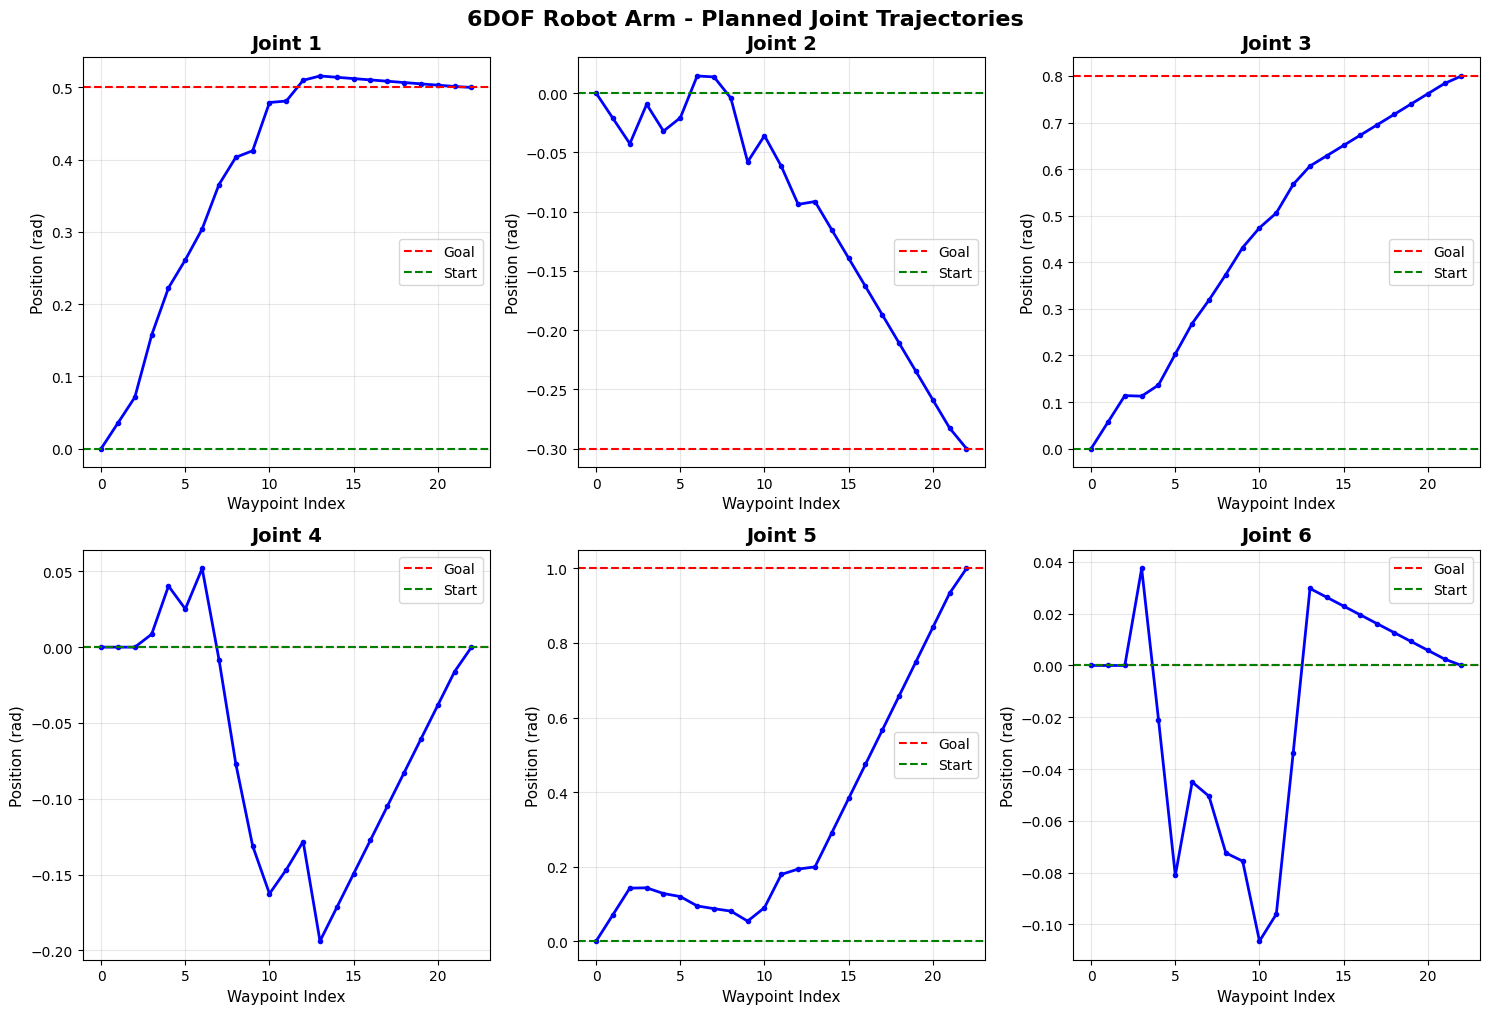


Rendering robot configurations...


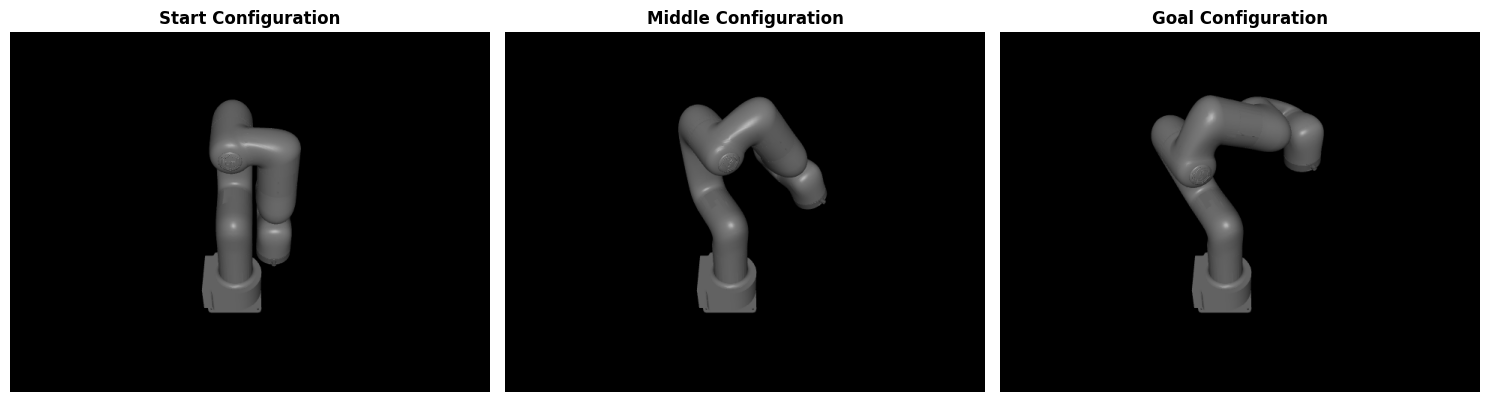


✓ Visualization complete!


In [6]:
# Visualize the planned path
import matplotlib.pyplot as plt

if path:
    # Plot joint trajectories
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for joint_idx in range(6):
        joint_positions = [waypoint[joint_idx] for waypoint in path]
        axes[joint_idx].plot(joint_positions, 'b-', linewidth=2, marker='o', markersize=3)
        axes[joint_idx].axhline(y=goal[joint_idx], color='r', linestyle='--', label='Goal')
        axes[joint_idx].axhline(y=start[joint_idx], color='g', linestyle='--', label='Start')
        axes[joint_idx].set_title(f'Joint {joint_idx + 1}', fontsize=14, fontweight='bold')
        axes[joint_idx].set_xlabel('Waypoint Index', fontsize=11)
        axes[joint_idx].set_ylabel('Position (rad)', fontsize=11)
        axes[joint_idx].grid(True, alpha=0.3)
        axes[joint_idx].legend()
    
    plt.tight_layout()
    plt.suptitle('6DOF Robot Arm - Planned Joint Trajectories', fontsize=16, fontweight='bold', y=1.01)
    plt.show()
    
    # Render some keyframes
    print("\nRendering robot configurations...")
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    keyframes = [0, len(path)//2, -1]  # Start, middle, end
    labels = ['Start', 'Middle', 'Goal']
    
    for idx, (frame_idx, label) in enumerate(zip(keyframes, labels)):
        sim.set_state({"qpos": path[frame_idx], "qvel": np.zeros(6)})
        img = sim.render_notebook()
        axes[idx].imshow(img)
        axes[idx].set_title(f'{label} Configuration', fontsize=12, fontweight='bold')
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n✓ Visualization complete!")
else:
    print("\n✗ FAILED: No path found")
